# INFORMATIONS

Ce notebook étudie le dataset nommé "spambase", trouvable au lien suivant: https://archive.ics.uci.edu/ml/datasets/Spambase.

        The "spam" concept is diverse: advertisements for products/web
        sites, make money fast schemes, chain letters, pornography...
	Our collection of spam e-mails came from our postmaster and 
	individuals who had filed spam.  Our collection of non-spam 
	e-mails came from filed work and personal e-mails, and hence
	the word 'george' and the area code '650' are indicators of 
	non-spam.  These are useful when constructing a personalized 
	spam filter.  One would either have to blind such non-spam 
	indicators or get a very wide collection of non-spam to 
	generate a general purpose spam filter.

In [3]:
# IMPORTS
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Import du jeu de données

## Définition du nom des colonnes
Hormi la colonne "is_spam", nous avons trois différents types de nom de colonne:
- word_freq_[mot]
- char_freq_[caractère]
- capital_run_length_[type]

On va raccourcir ces noms, afin que cela soit plus lisible, ce qui nous donnera:
- wf_[mot]
- cf_[caractère]
- cap_rl_[type]

In [4]:
# Définition des noms de colonnes à partir du fichier spambase.names
columnsName = [ "word_freq_make",
"word_freq_address",
"word_freq_all",
"word_freq_3d",
"word_freq_our",
"word_freq_over",
"word_freq_remove",
"word_freq_internet",
"word_freq_order",
"word_freq_mail",
"word_freq_receive",
"word_freq_will",
"word_freq_people",
"word_freq_report",
"word_freq_addresses",
"word_freq_free",
"word_freq_business",
"word_freq_email",
"word_freq_you",
"word_freq_credit",
"word_freq_your",
"word_freq_font",
"word_freq_000",
"word_freq_money",
"word_freq_hp",
"word_freq_hpl",
"word_freq_george",
"word_freq_650",
"word_freq_lab",
"word_freq_labs",
"word_freq_telnet",
"word_freq_857",
"word_freq_data",
"word_freq_415",
"word_freq_85",
"word_freq_technology",
"word_freq_1999",
"word_freq_parts",
"word_freq_pm",
"word_freq_direct",
"word_freq_cs",
"word_freq_meeting",
"word_freq_original",
"word_freq_project",
"word_freq_re",
"word_freq_edu",
"word_freq_table",
"word_freq_conference",
"char_freq_;",
"char_freq_(",
"char_freq_[",
"char_freq_!",
"char_freq_$",
"char_freq_#",
"capital_run_length_average",
"capital_run_length_longest",
"capital_run_length_total",
"is_spam" ]

columnsName = [ "wf_make",
"wf_address",
"wf_all",
"wf_3d",
"wf_our",
"wf_over",
"wf_remove",
"wf_internet",
"wf_order",
"wf_mail",
"wf_receive",
"wf_will",
"wf_people",
"wf_report",
"wf_addresses",
"wf_free",
"wf_business",
"wf_email",
"wf_you",
"wf_credit",
"wf_your",
"wf_font",
"wf_000",
"wf_money",
"wf_hp",
"wf_hpl",
"wf_george",
"wf_650",
"wf_lab",
"wf_labs",
"wf_telnet",
"wf_857",
"wf_data",
"wf_415",
"wf_85",
"wf_technology",
"wf_1999",
"wf_parts",
"wf_pm",
"wf_direct",
"wf_cs",
"wf_meeting",
"wf_original",
"wf_project",
"wf_re",
"wf_edu",
"wf_table",
"wf_conference",
"cf_;",
"cf_(",
"cf_[",
"cf_!",
"cf_$",
"cf_#",
"cap_rl_average",
"cap_rl_longest",
"cap_rl_total",
"is_spam" ]

## Import des données

In [5]:
# Lecture du fichier de données 
dfData = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data', names=columnsName)
# Affichage
dfData

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,wf_receive,wf_will,wf_people,wf_report,wf_addresses,wf_free,wf_business,wf_email,wf_you,wf_credit,wf_your,wf_font,wf_000,wf_money,wf_hp,wf_hpl,wf_george,wf_650,wf_lab,wf_labs,wf_telnet,wf_857,wf_data,wf_415,wf_85,wf_technology,wf_1999,wf_parts,wf_pm,wf_direct,wf_cs,wf_meeting,wf_original,wf_project,wf_re,wf_edu,wf_table,wf_conference,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,cap_rl_average,cap_rl_longest,cap_rl_total,is_spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


# Vérification et nettoyage des données

Dans la page décrivant les données, il est indiqué que des valeurs seraient manquantes. On va donc vérifier si c'est le cas, et remplacer les données si besoin.

In [6]:
# Vérification du nombre de données nulles pour chaque colonne
dfData.isnull().sum()

wf_make           0
wf_address        0
wf_all            0
wf_3d             0
wf_our            0
wf_over           0
wf_remove         0
wf_internet       0
wf_order          0
wf_mail           0
wf_receive        0
wf_will           0
wf_people         0
wf_report         0
wf_addresses      0
wf_free           0
wf_business       0
wf_email          0
wf_you            0
wf_credit         0
wf_your           0
wf_font           0
wf_000            0
wf_money          0
wf_hp             0
wf_hpl            0
wf_george         0
wf_650            0
wf_lab            0
wf_labs           0
wf_telnet         0
wf_857            0
wf_data           0
wf_415            0
wf_85             0
wf_technology     0
wf_1999           0
wf_parts          0
wf_pm             0
wf_direct         0
wf_cs             0
wf_meeting        0
wf_original       0
wf_project        0
wf_re             0
wf_edu            0
wf_table          0
wf_conference     0
cf_;              0
cf_(              0


Il n'y a pourtant pas l'air d'avoir de données manquantes. 

Peut-être que l'auteur a assigné certaines valeurs à 0 par défaut, mais nous n'avons aucun moyen de détecter lesquelles sont manquantes et lesquelles valent réellement 0. Si l'on prend le code ci-dessous, on peut voir qu'il y a plus de 3548 lignes n'ayant aucune occurence du mot "make", soit plus de 60% du dataset: impossible de les mettre de côté.

Nous continuerons donc l'étude de ce dataset avec toutes les données d'origine, qui semblent être valides. 


In [7]:
# Nombre de lignes ayant la colonne "wf_make" valant 0
len(dfData[dfData.wf_make == 0])

3548

# Analyse générale du jeu de données

Nous allons commencer par regarder le nombre de spam et de mails.

In [8]:
# Affichage du nombre de spams et non-spams
dfData.groupby('is_spam').size()

is_spam
0    2788
1    1813
dtype: int64

In [9]:
# Création d'un colonne contenant le label de la classe is_spam
dfData['is_spam_label'] = 'mail'
dfData.loc[(dfData.is_spam == 1), 'is_spam_label'] = 'spam'

dfData[['is_spam', 'is_spam_label']]

,is_spam,is_spam_label
0,1,spam
1,1,spam
2,1,spam
3,1,spam
4,1,spam
...,...,...
4596,0,mail
4597,0,mail
4598,0,mail
4599,0,mail


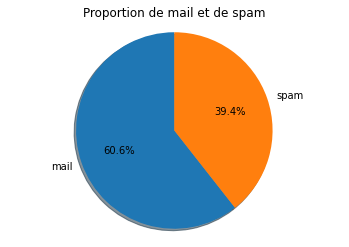

In [10]:
# Affichage d'un graphique représentant le nombre de spam et de mail
fig, ax = plt.subplots()

ax.pie(dfData.groupby('is_spam').size(), labels=dfData.groupby('is_spam_label').groups, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
ax.set_title('Proportion de mail et de spam')
plt.show()

Nous avons donc beaucoup plus de mails (60.6%) que de spams (39.4%). Regardons maintenant le résumé de chaque colonne.

In [11]:
# Affichage du résumé des colonnes numériques (de manière transposée afin que cela soit plus lisible)
dfData.describe().T

,count,mean,std,min,25%,50%,75%,max
wf_make,4601.0,0.104553,0.305358,0.0,0.000,0.000,0.000,4.540
wf_address,4601.0,0.213015,1.290575,0.0,0.000,0.000,0.000,14.280
wf_all,4601.0,0.280656,0.504143,0.0,0.000,0.000,0.420,5.100
wf_3d,4601.0,0.065425,1.395151,0.0,0.000,0.000,0.000,42.810
wf_our,4601.0,0.312223,0.672513,0.0,0.000,0.000,0.380,10.000
wf_over,4601.0,0.095901,0.273824,0.0,0.000,0.000,0.000,5.880
wf_remove,4601.0,0.114208,0.391441,0.0,0.000,0.000,0.000,7.270
wf_internet,4601.0,0.105295,0.401071,0.0,0.000,0.000,0.000,11.110
wf_order,4601.0,0.090067,0.278616,0.0,0.000,0.000,0.000,5.260
wf_mail,4601.0,0.239413,0.644755,0.0,0.000,0.000,0.160,18.180


On peut voir ici que la majorité des critères ont les quartiles de 25% et 50% valant 0. N'oublions pas qu'ici, les mails et spams sont mélangés. Voyons voir quelles valeurs nous obtenons si nous les séparons par groupe :

In [12]:
# Résumé du critère de fréquence du mot "all" entre la classe spam et la classe mail
dfData[['wf_all', 'is_spam_label']].groupby('is_spam_label').describe()

wf_all                                              
                count      mean       std  min  25%  50%   75%  max
is_spam_label                                                      
mail           2788.0  0.200581  0.502959  0.0  0.0  0.0  0.12  5.1
spam           1813.0  0.403795  0.480725  0.0  0.0  0.3  0.64  3.7

On peut maintenant voir que le quartile 50% vaut 0.3 pour la classe spam, mais 0.0 pour la classe mail. Pour la suite de cette étude, nous allons étudier les deux groupes séparés et les comparer entre eux.

Enfin, avant d'étudier les différents groupes, jetons un coup d'oeil à la matrice de corrélation du jeu de données:

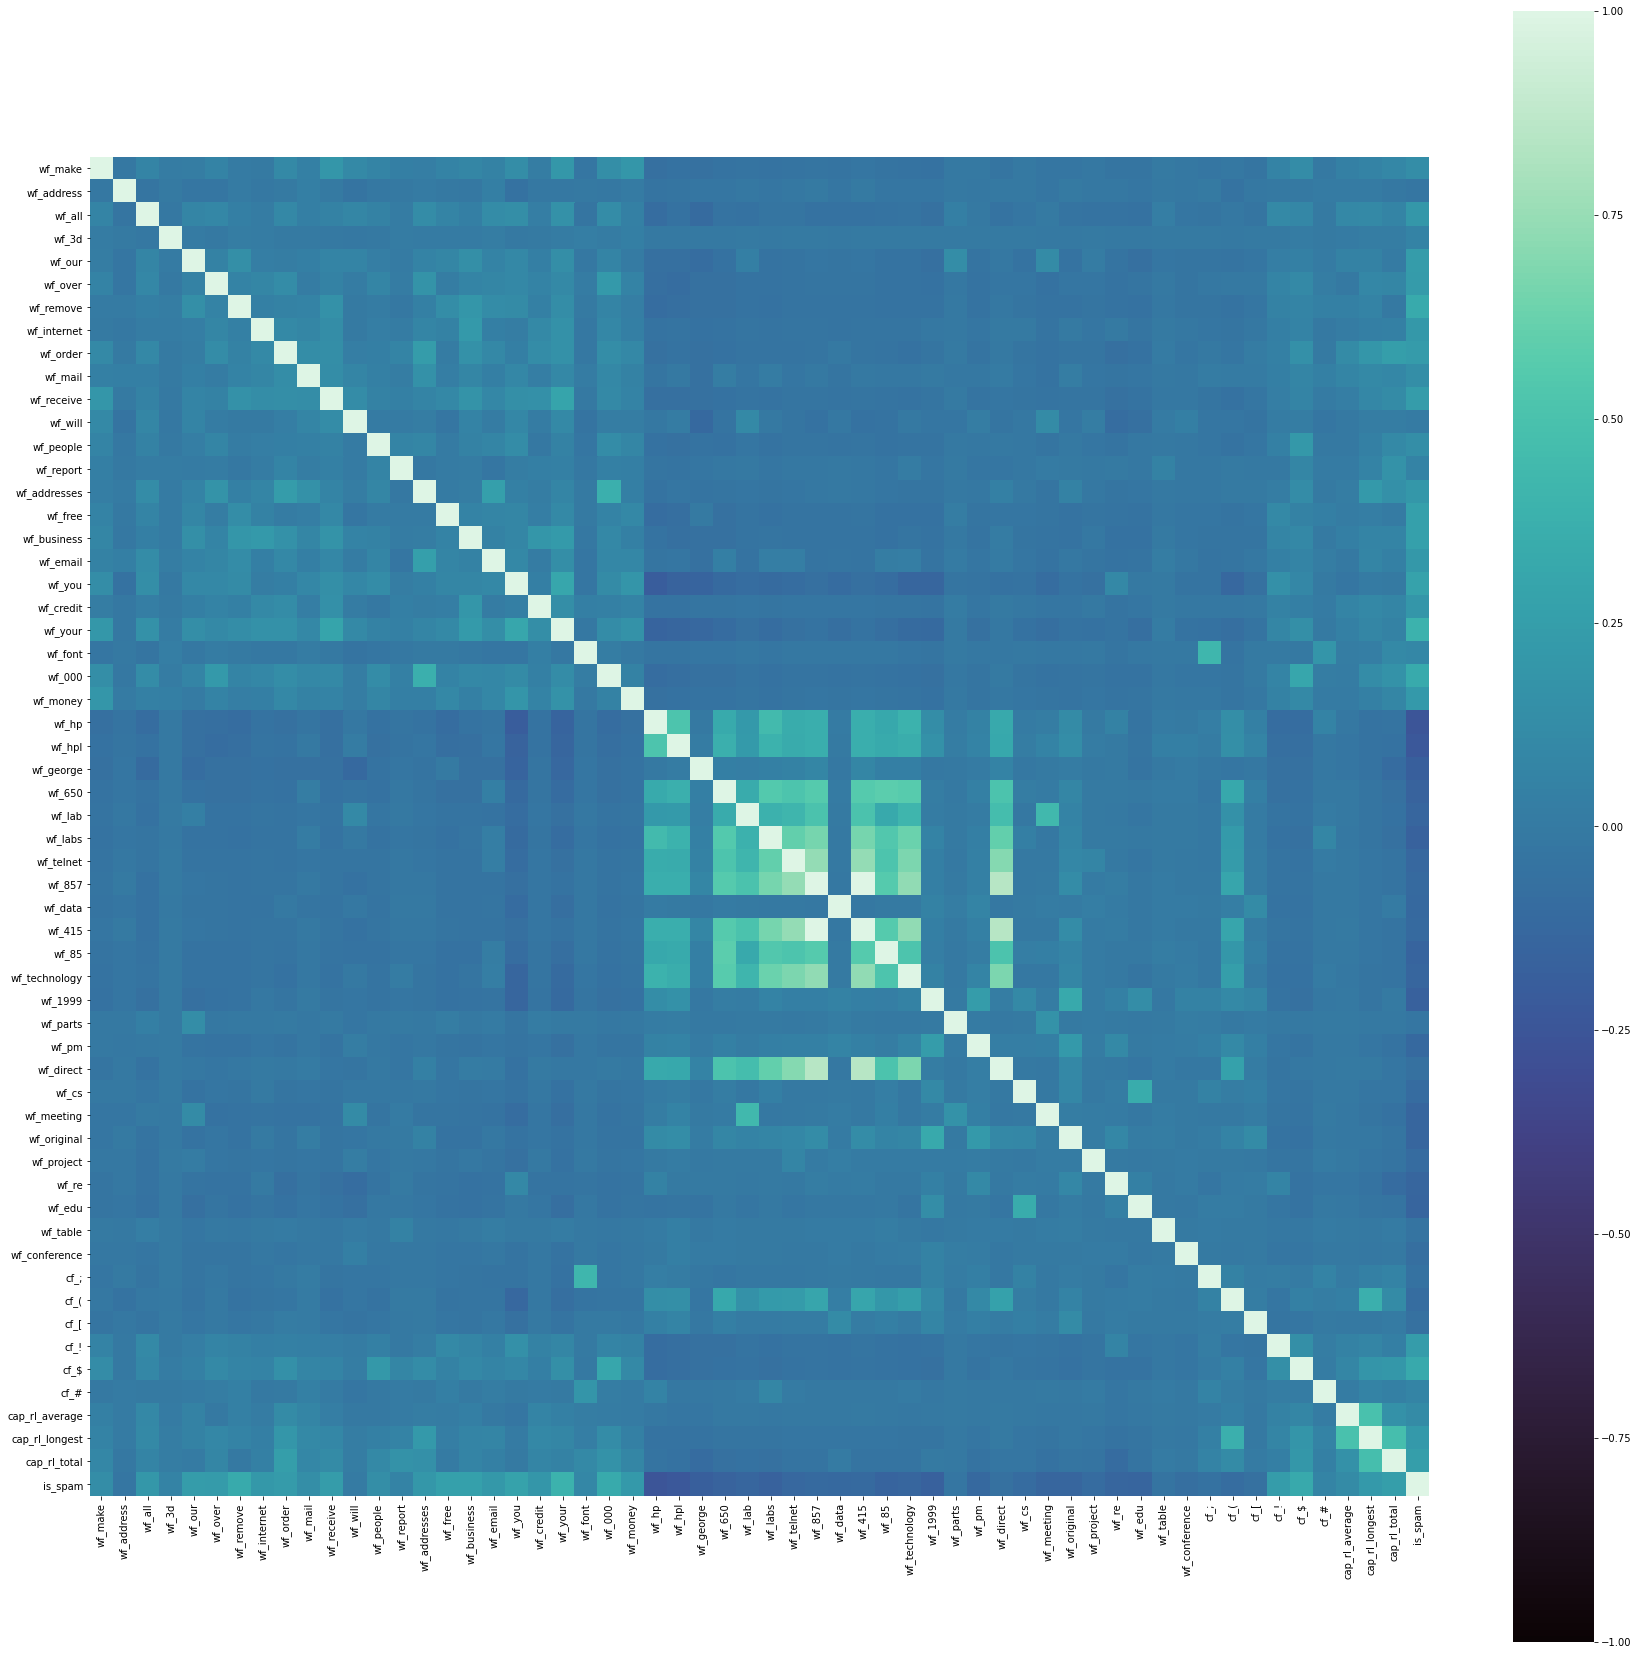

In [104]:
correlation_matrix = dfData.loc[:, dfData.columns != 'is_spam_label'].corr()
fig = plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, cmap ="mako", vmin=-1, square=True,)

# Création des différents groupes à étudier

Premièrement, nous allons créer le groupe des spams et le groupe des mails.

In [13]:
# Création des différents groupes étudiés
spams = dfData[dfData['is_spam'] == 1]
mails = dfData[dfData['is_spam'] == 0]

De plus, comme présenté au début, nous avons trois types d'attributs:
- la fréquence des mots
- la fréquence des caractères
- quelques statistiques sur les lettres majuscules

On va donc grouper les noms de colonnes communs pour pouvoir faire une étude par type d'attributs.

In [14]:
# Récupération de la fréquence des mots
word_frequency_columns = dfData.columns[0:48].values.tolist()

word_frequency_columns

['wf_make',
 'wf_address',
 'wf_all',
 'wf_3d',
 'wf_our',
 'wf_over',
 'wf_remove',
 'wf_internet',
 'wf_order',
 'wf_mail',
 'wf_receive',
 'wf_will',
 'wf_people',
 'wf_report',
 'wf_addresses',
 'wf_free',
 'wf_business',
 'wf_email',
 'wf_you',
 'wf_credit',
 'wf_your',
 'wf_font',
 'wf_000',
 'wf_money',
 'wf_hp',
 'wf_hpl',
 'wf_george',
 'wf_650',
 'wf_lab',
 'wf_labs',
 'wf_telnet',
 'wf_857',
 'wf_data',
 'wf_415',
 'wf_85',
 'wf_technology',
 'wf_1999',
 'wf_parts',
 'wf_pm',
 'wf_direct',
 'wf_cs',
 'wf_meeting',
 'wf_original',
 'wf_project',
 'wf_re',
 'wf_edu',
 'wf_table',
 'wf_conference']

In [15]:
# Récupération de la fréquence des caractères
char_frequency_columns = dfData.columns[49:54].values.tolist()

char_frequency_columns

['cf_(', 'cf_[', 'cf_!', 'cf_$', 'cf_#']

In [16]:
# Récupération des statistiques sur les majuscules
cap_stats_columns = dfData.columns[54:57].values.tolist()

cap_stats_columns

['cap_rl_average', 'cap_rl_longest', 'cap_rl_total']

# Etude de la fréquence des mots

Commençons par étudier les attributs de fréquences des mots. Nous allons chercher à voir quels sont les attributs les plus susceptibles de nous aider à différencier un mail d'un spam.

Comparons donc leur moyenne pour commencer.

In [17]:
# Crée un graphique bar comparant deux listes de valeurs entre les classes de is_spam
def plot_bar_compare_isspam(title, df, columns):
    width = 0.35
    x = np.arange(len(columns)) 
    plt.figure(figsize=(15,20))
    fig, ax = plt.subplots()
    # Création des barres rectangulaires
    rects1 = ax.bar(x - width/2, df.loc['mail', columns], width, label='Mail')
    rects2 = ax.bar(x + width/2, df.loc['spam', columns], width, label='Spam')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Fréquence')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(columns)
    ax.legend()

    fig.set_figheight(5)
    fig.set_figwidth(28)

    plt.show()

In [18]:
# Récupération des valeurs moyennes de chaque colonne
df_means = dfData.groupby('is_spam_label').mean()

df_means

,wf_make,wf_address,wf_all,wf_3d,wf_our,wf_over,wf_remove,wf_internet,wf_order,wf_mail,wf_receive,wf_will,wf_people,wf_report,wf_addresses,wf_free,wf_business,wf_email,wf_you,wf_credit,wf_your,wf_font,wf_000,wf_money,wf_hp,wf_hpl,wf_george,wf_650,wf_lab,wf_labs,wf_telnet,wf_857,wf_data,wf_415,wf_85,wf_technology,wf_1999,wf_parts,wf_pm,wf_direct,wf_cs,wf_meeting,wf_original,wf_project,wf_re,wf_edu,wf_table,wf_conference,cf_;,cf_(,cf_[,cf_!,cf_$,cf_#,cap_rl_average,cap_rl_longest,cap_rl_total,is_spam
is_spam_label,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
mail,0.073479,0.244466,0.200581,0.000886,0.181040,0.044544,0.009383,0.038415,0.038049,0.167170,0.021711,0.536324,0.061664,0.042403,0.008318,0.073587,0.048346,0.097292,1.270341,0.007579,0.438702,0.045226,0.007088,0.017138,0.895473,0.431994,1.265265,0.193806,0.162794,0.165854,0.106033,0.077306,0.150986,0.077787,0.169455,0.141671,0.197744,0.018723,0.121679,0.083117,0.072027,0.216808,0.070581,0.126636,0.415760,0.287184,0.008192,0.051227,0.050281,0.158578,0.022684,0.109984,0.011648,0.021713,2.377301,18.214491,161.470947,0.0
spam,0.152339,0.164650,0.403795,0.164672,0.513955,0.174876,0.275405,0.208141,0.170061,0.350507,0.118434,0.549972,0.143547,0.083574,0.112079,0.518362,0.287507,0.319228,2.264539,0.205521,1.380370,0.238036,0.247055,0.212879,0.017479,0.009173,0.001550,0.018798,0.000684,0.005968,0.001274,0.000518,0.014562,0.001776,0.006928,0.029515,0.043469,0.004710,0.012427,0.036718,0.000055,0.002443,0.008450,0.006244,0.125091,0.014727,0.001219,0.002101,0.020573,0.108970,0.008199,0.513713,0.174478,0.078877,9.519165,104.393271,470.619415,1.0


<Figure size 1080x1440 with 0 Axes>

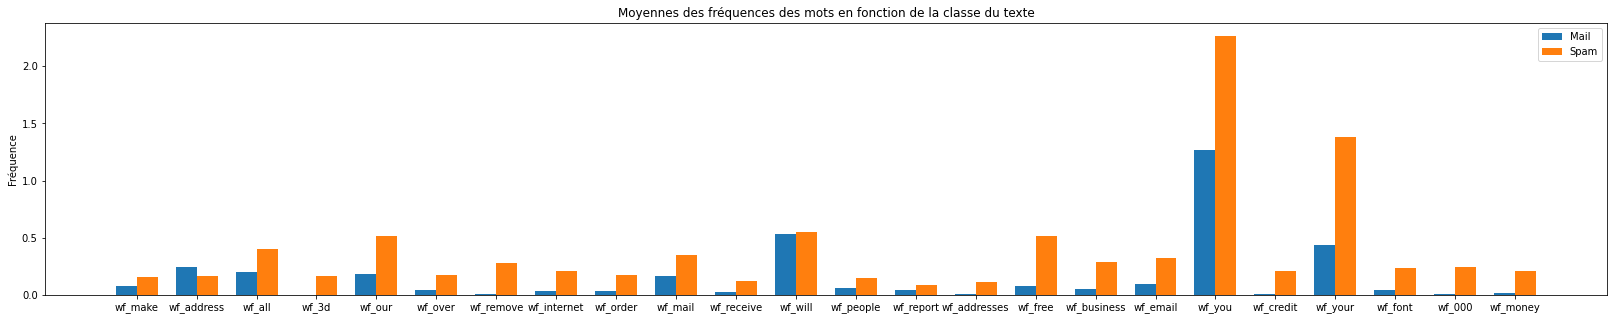

<Figure size 1080x1440 with 0 Axes>

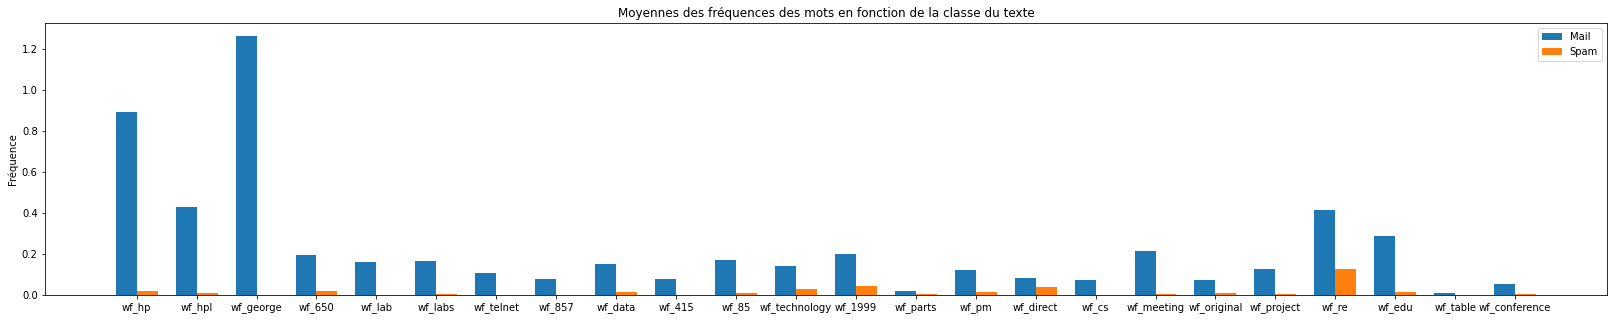

In [19]:
# On sépare les données en deux graphiques, pour que cela reste lisible
plot_bar_compare_isspam('Moyennes des fréquences des mots en fonction de la classe du texte', df_means, word_frequency_columns[0:24])
plot_bar_compare_isspam('Moyennes des fréquences des mots en fonction de la classe du texte', df_means, word_frequency_columns[24:48])

Afin de mieux visualiser la fréquence des mots, on va maintenant afficher les valeurs de manière ordonnée, sous forme de deux graphiques: le premier contiendra les mots ayant une plus forte fréquence dans les mails que dans les spams, et inversement pour le deuxième.

In [20]:
# Récupération des valeurs moyennes de chaque colonne
df_means = dfData.groupby('is_spam_label').mean()

# Récupération des colonnes de fréquence de mots les plus hautes pour chaque classe is_spam
mail_greater_wf_columns = []
spam_greater_wf_columns = []

for column in word_frequency_columns:
  if (df_means[column]['mail'] > df_means[column]['spam']):
    mail_greater_wf_columns.append(column)
  else:
    spam_greater_wf_columns.append(column)

<Figure size 1080x1440 with 0 Axes>

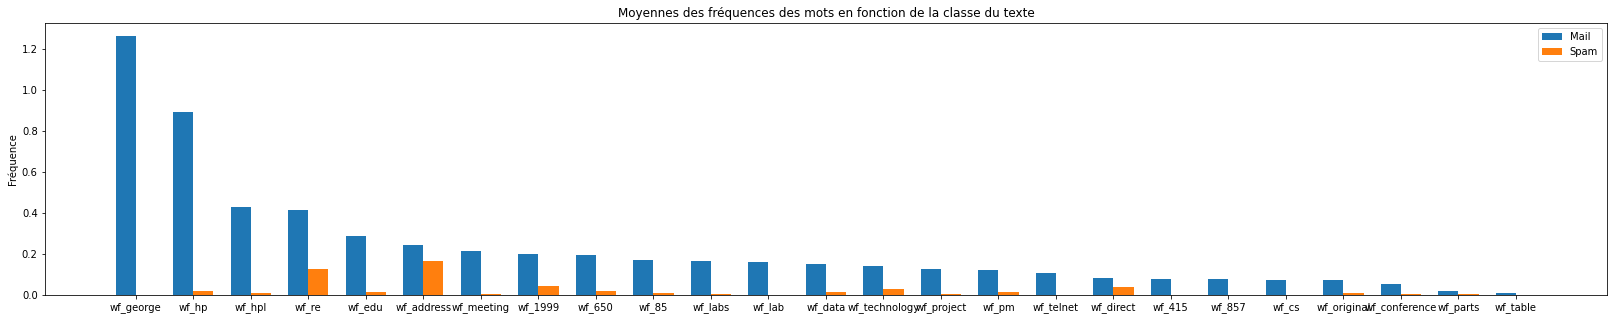

<Figure size 1080x1440 with 0 Axes>

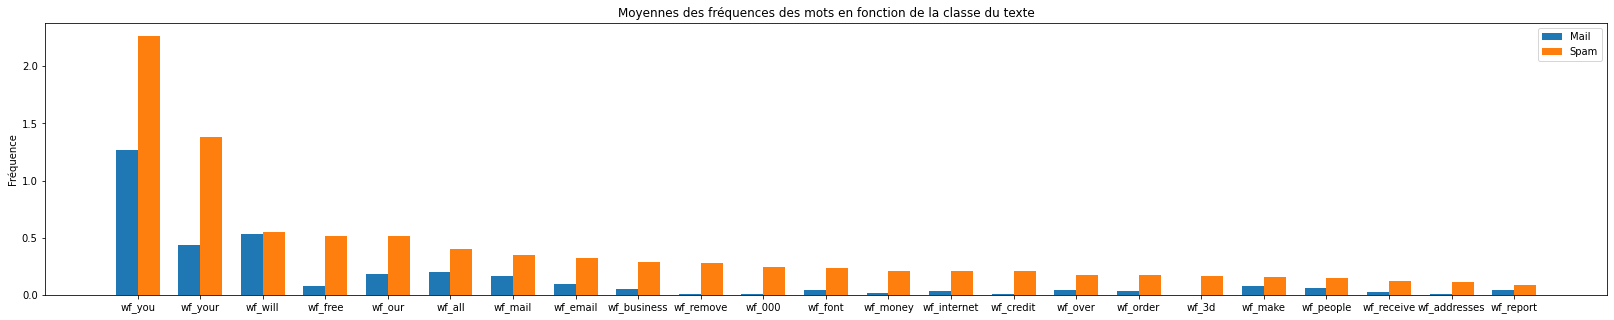

In [21]:
# Récupération des valeurs pour chaque classe
mail_greater_wf = df_means.loc['mail', mail_greater_wf_columns].sort_values(ascending=False)
spam_greater_wf = df_means.loc['spam', spam_greater_wf_columns].sort_values(ascending=False)

plot_bar_compare_isspam('Moyennes des fréquences des mots en fonction de la classe du texte', df_means, mail_greater_wf.index)
plot_bar_compare_isspam('Moyennes des fréquences des mots en fonction de la classe du texte', df_means, spam_greater_wf.index)

## Analyse des graphiques des moyennes






### Les fréquences de mot dans les mails

<Figure size 1080x1440 with 0 Axes>

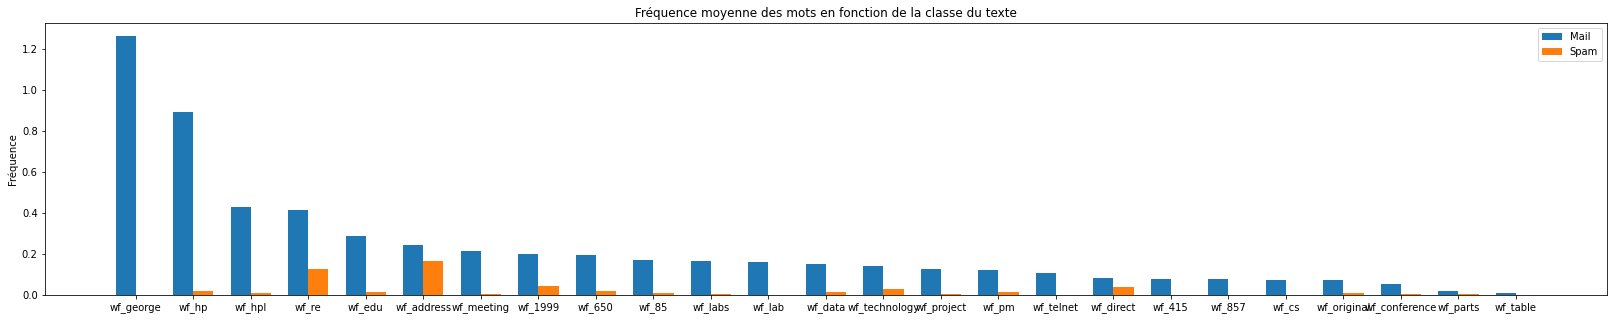

In [22]:
plot_bar_compare_isspam('Fréquence moyenne des mots en fonction de la classe du texte', df_means, mail_greater_wf.index)

#### Les fréquences les plus importantes
Sur le premier graphique, celui contenant les fréquences de mot apparaissant dans les mails plus souvent que dans les spams, on peut trouver le mot "george" en tête de liste. Cela n'a rien d'étonnant, vu que dans la description du dataset, on retrouve ces deux lignes:

***Donor: George Forman (gforman at nospam hpl.hp.com) 650-857-7835***

***Our collection of non-spam e-mails came from filed work and personal e-mails, and hence the word 'george' and the area code '650' are indicators of non-spam.***

Le prénom reste une information personnelle, que les spammeurs n'ont pas forcément la possibilité de récupérer à partir d'une simple adresse email. Aujourd'hui, c'est parfois plus facile quand des bases de données hackées sont accessibles de récupérer des adresses mails avec des informations personnelles liées à celle-ci. Mais ce dataset datant de 1999, je me dis qu'il y en avait certainement moins qu'aujourd'hui, vu que l'on ne récupérait pas autant d'informations sur les personnes auparavant.

On voit aussi que les noms de domaine "hp" et "hpl" viennent tout juste après "george": cela reste des informations qui ne sont pas forcément utiles pour un spammeur, d'où leurs fréquences quasi-nulle dans les spams.

#### Le mot "re"
Le mot "re" suit de très près la troisisème plus grande fréquence, et il est intéressant de s'épancher un peu plus sur son cas. Je présume que celui-ci était déjà utilisé en 1999 dans les titres de message, tel que, par exemple "RE: info meeting", signifiant une réponse au précédent mail nommé "info meeting". Le dataset réunissant des mails personnels et professionnels, ce n'est pas étonnant de le voir apparaître. 

Par contre, on peut voir que ce dernier apparaît en moyenne 0.1% de fois par spam. Aujourd'hui, une méthode utilisée par les spammeurs est d'utiliser le terme "RE: ..." dans le titre pour inciter la cible à ouvrir celui-ci, comme si cette dernière avait déjà participé à cette conversation. On trouve parfois le mot "RE" dans les filtres de spam d'ailleurs. Il est donc probable qu'en 1999, certains spammeurs ont tenté d'utiliser cette technique eux aussi.

#### Le mot "address"
Ce qui est intéressant ici est que la fréquence du mot "address" reste plutôt proche entre le mail et le spam. C'est une information qui peut être demandé au travail ou par des proches, mais aussi par des spammeurs qui auraient besoin d'une adresse pour envoyer de la pub papier à la cible. Pour ce dataset, il ne serait donc pas effectif si l'on devait créer un filtre de spam. 


#### Les autres mots
Le reste de mots sont constitués pour la plupart de chiffres et de termes professionnels (meeting, labs, conference...) et la fréquence dans les spams est quasi-nulle, ce qui ne semble pas étonnant.

### Les fréquences de mot dans les spams

<Figure size 1080x1440 with 0 Axes>

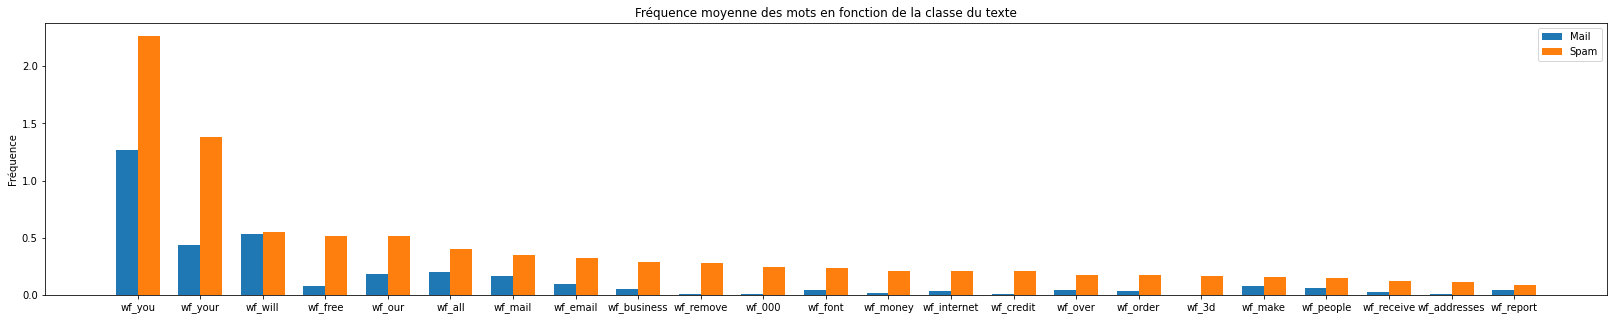

In [23]:
plot_bar_compare_isspam('Fréquence moyenne des mots en fonction de la classe du texte', df_means, spam_greater_wf.index)


#### Les mots les plus communs en anglais
Avant d'étudier plus en profondeur, il y a une certaine catégorie de mots sur ce deuxième graphique à prendre avec précautions: les mots communs en anglais. De nombreuses listes de vocabulaire sont existantes pour chaque langue, regroupant souvent les 100 à 500 mots les plus fréquents à l'écrit dans celle-ci. Vous pouvez d'ailleurs en retrouver plusieurs ici, basées sur différentes sources : https://en.wikipedia.org/wiki/Most_common_words_in_English. 

Si l'on s'en réfère à ces listes, on peut identifier certains mots appartenant à celles-ci dans notre graphique:
- you
- your
- will
- our
- all
- over
- make
- people

De ce fait, même si ces derniers apparaissent plus souvent dans les spams que dans les mails de ce dataset, il ne faut pas oublier qu'il reste fréquent en anglais écrit. De plus, n'ayant pas le nombre de caractères total pour chaque mail, les fréquences sont aussi à prendre avec des pincettes.

#### Les mots commerciaux
En mettant de côté les mots communs vus précédemment, on peut dégager un second groupe: les mots commerciaux. 
On retrouve en effet les mots "free", "business", "money", "credit", "order" et "receive". On peut en dégager deux types de technique de spam:
- Parler d'un produit/commande gagné ou gratuit pour le correspondant (free, receive, order)
- Parler d'une affaire juteuse, qui pourrait rapporter de l'argent facilement (business, money, credit)
Il n'est donc pas étonnant de voir le mot gratuit (free) en première place des fréquences (si l'on écarte les mots communs devant lui), qui attire toujours le lecteur du message.

## Sélection des attributs significatifs

Après analyse, on va maintenant pouvoir déterminer quels sont les attributs les plus significatifs. 
On va sélectionner ceux qui semblent apparaître les plus souvents dans les mails et qui ont une différence notable de fréquence entre mail et spam.

**Pour les mails:**
- george
- hp
- hpl
- edu
- meeting

**Pour les spams:**
- free

Cependant, nous allons devoir regarder de plus près certains mots, la moyenne ne suffisant pas pour se prononcer. Nous allons nous intéresser aux quartiles et médiannes des mots suivants, pour déterminer s'ils seront intéressant pour détecter un mail d'un spam:
- re
- you
- your
- our
- all

## Comparaison en détails des attributs pouvant se révéler être significatifs

Afin d'obtenir les valeurs qui nous intéresse, nous allons dresser des boites à moustache pour chaque mot sélectionné:
- re
- you
- your
- our
- all

In [24]:
# Fonction d'affichage d'une boîte à moustache pour un mot donné du dataset
def plot_box_compare_isspam(word, df, showfliers):
    plt.figure(figsize=(2,8))
    fig, ax = plt.subplots()

    sns.boxplot(x='is_spam_label', y='wf_'+ word, hue='is_spam_label',
                 data=df, palette="Set3", showfliers = showfliers)
    ax.set_ylabel('Fréquence')
    ax.set_xlabel(word)
    ax.set_title('Boîte à moustache pour la fréquence du mot "' + word + '"')
    ax.legend()

    plt.show()

<Figure size 144x576 with 0 Axes>

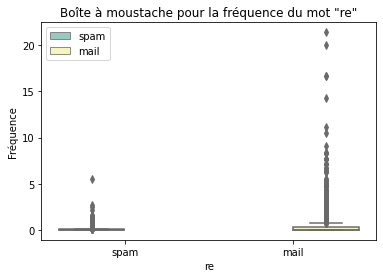

<Figure size 144x576 with 0 Axes>

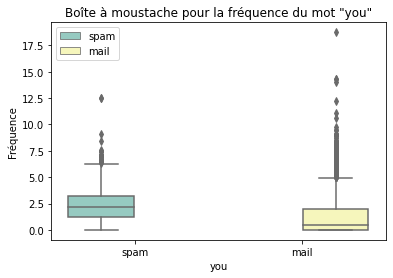

<Figure size 144x576 with 0 Axes>

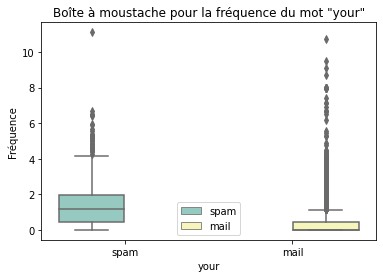

<Figure size 144x576 with 0 Axes>

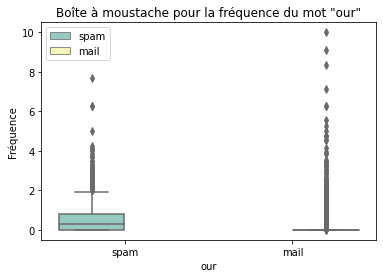

<Figure size 144x576 with 0 Axes>

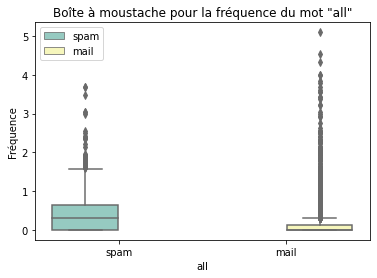

In [25]:
# Récupération des mots à étudier
selected_words = ['re', 'you', 'your', 'our', 'all']

# Affichage des boîtes à moustache
for word in selected_words:
  plot_box_compare_isspam(word, dfData, True)


Les boîtes étant illisibles à cause de la taille, nous allons les voir une par une. 

Nous allons avant changer notre fonction d'affichage, pour pouvoir afficher les graphiques avec ou sans les valeurs extérieures.

In [26]:
# Fonction d'affichage d'une boîte à moustache pour un mot donné du dataset
def plot_box_compare_isspam_vertical(word, df, showfliers):
    plt.figure(figsize=(25,5))
    sns.boxplot(x='wf_'+ word, y='is_spam_label', hue='is_spam_label',
                 data=df, palette="Set3", showfliers = showfliers)
    plt.ylabel(word)
    plt.xlabel('Fréquence')
    # Définition du titre
    title = 'Boîte à moustache pour la fréquence du mot "' + word + '"'
    if (showfliers):
      title += ' - avec valeurs extérieures'
    else:
      title += ' - sans valeurs extérieures'
      
    plt.title(title)

### Etude du mot "re"


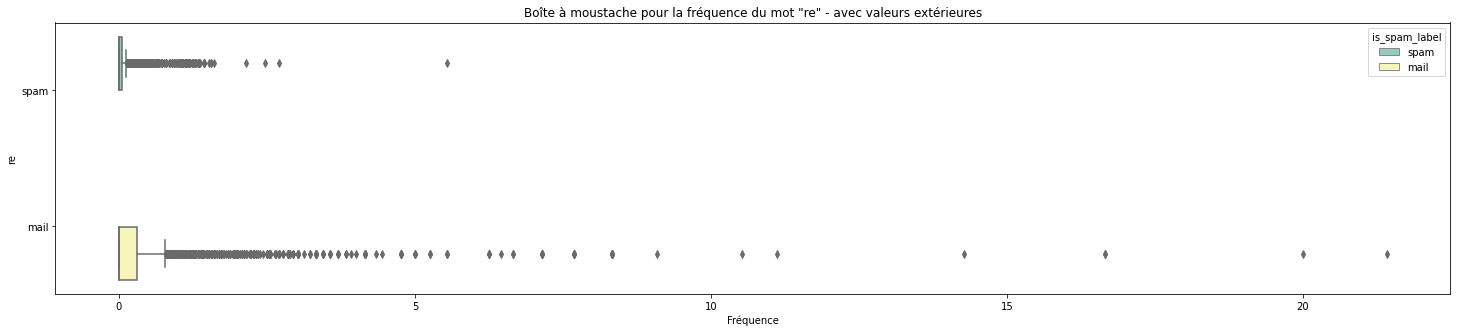

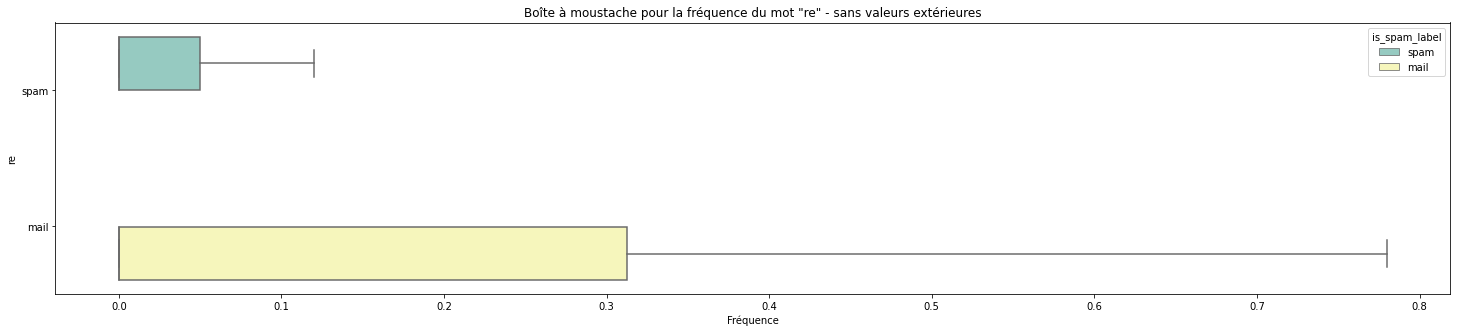

In [27]:
# Affichage avec et sans les valeurs extérieures
plot_box_compare_isspam_vertical('re', dfData, True)
plot_box_compare_isspam_vertical('re', dfData, False)

In [28]:
# Affichage sous forme de tableau
dfData[['wf_re', 'is_spam_label']].groupby('is_spam_label').describe()

wf_re                                                  
                count      mean       std  min  25%  50%     75%    max
is_spam_label                                                          
mail           2788.0  0.415760  1.260273  0.0  0.0  0.0  0.3125  21.42
spam           1813.0  0.125091  0.322770  0.0  0.0  0.0  0.0500   5.55

On peut conclure que le mot "re" est révélateur du mail. Plus de 25% des fréquences de la classe mail sont supérieures à 0.3125, tandis que celles de la classe spam sont supérieures à 0.0500.  

### Etude du mot "you"


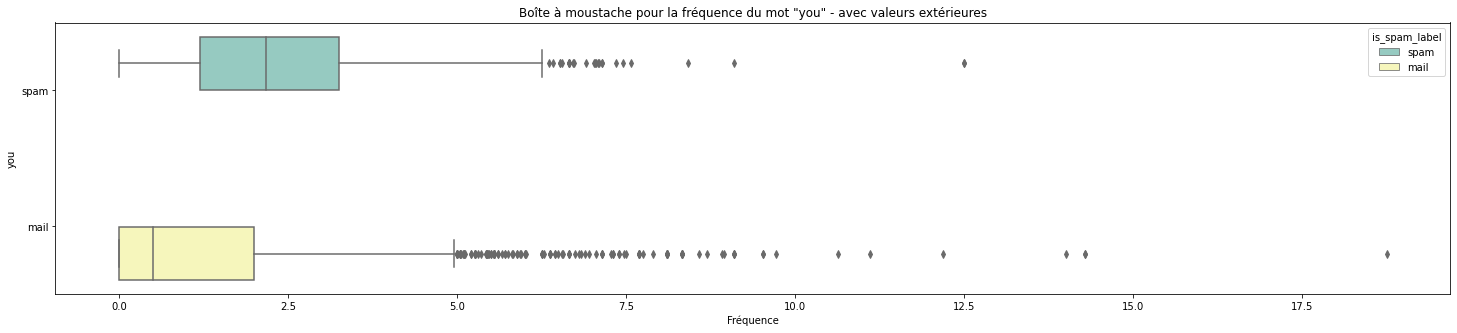

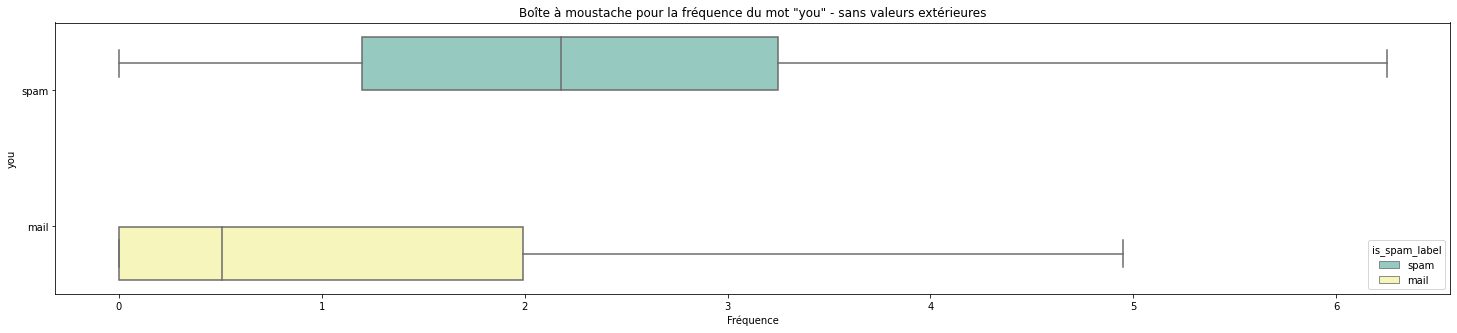

In [29]:
# Affichage avec et sans les valeurs extérieures
plot_box_compare_isspam_vertical('you', dfData, True)
plot_box_compare_isspam_vertical('you', dfData, False)

In [30]:
# Affichage sous forme de tableau
dfData[['wf_you', 'is_spam_label']].groupby('is_spam_label').describe()

wf_you                                                   
                count      mean       std  min  25%   50%     75%    max
is_spam_label                                                           
mail           2788.0  1.270341  1.793636  0.0  0.0  0.51  1.9925  18.75
spam           1813.0  2.264539  1.566885  0.0  1.2  2.18  3.2500  12.50

Le mot "you" semble révélateur de spam. Il est important de souligner que l'étude de la moyenne seule ici n'aurait pas suffit. En effet, pour une moyenne à 1.27 dans la classe mail, 50% des valeurs sont tout de même inférieur à 0.51. Avec six valeurs extérieures supérieures à 10.0, notamment celle valant 18.75, la moyenne a été bien gonflée. 

Ainsi, on peut se dire qu'on a problablement de grandes chances d'avoir affaire à un spam lorsque la fréquence est supérieure à 2.18.

### Etude du mot "your" 

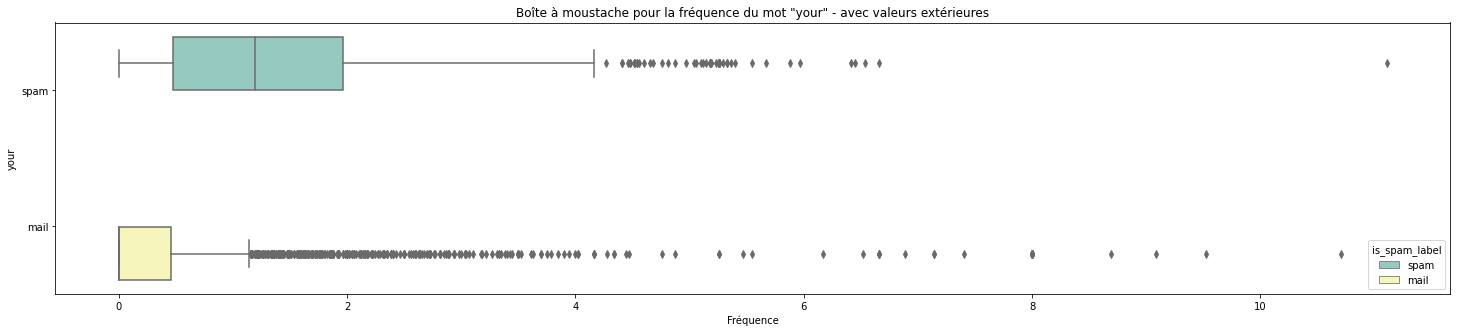

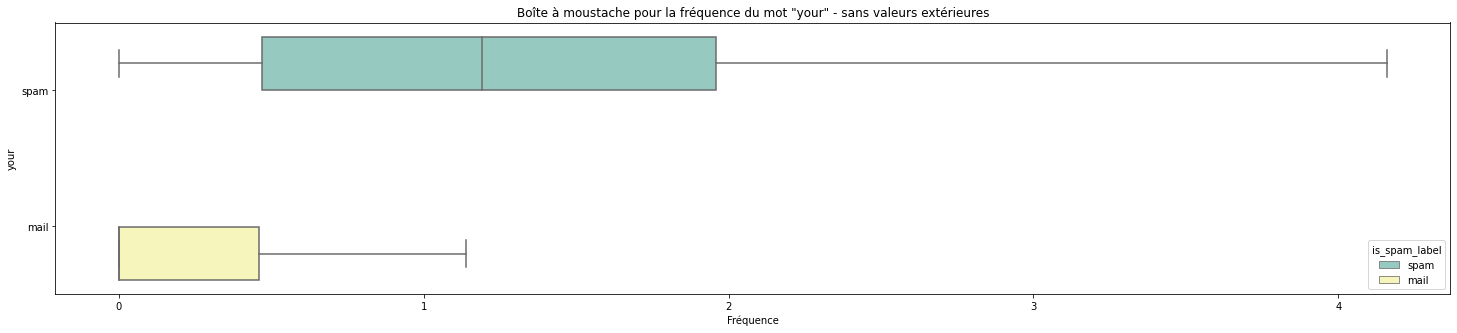

In [31]:
# Affichage avec et sans les valeurs extérieures
plot_box_compare_isspam_vertical('your', dfData, True)
plot_box_compare_isspam_vertical('your', dfData, False)

In [32]:
# Affichage sous forme de tableau
dfData[['wf_your', 'is_spam_label']].groupby('is_spam_label').describe()

wf_your                                                  
                count      mean       std  min   25%   50%   75%    max
is_spam_label                                                          
mail           2788.0  0.438702  1.025167  0.0  0.00  0.00  0.46  10.71
spam           1813.0  1.380370  1.227385  0.0  0.47  1.19  1.96  11.11

Ici aussi, nous avons un exemple flagrant d'une moyenne gonflée par quelques valeurs élevées. 

Pour une moyenne de 0.43 de la classe mail, on se retrouve avec plus de 75% des valeurs inférieures à 0.46, alors que plus de 25% des valeurs de la classe spam sont supérieures à 0.47. 

Le mot "your" est pour le moment, selon moi, un des meilleurs attributs utiles pour la détection entre les cinq mots étudiés.

### Etude du mot "our"

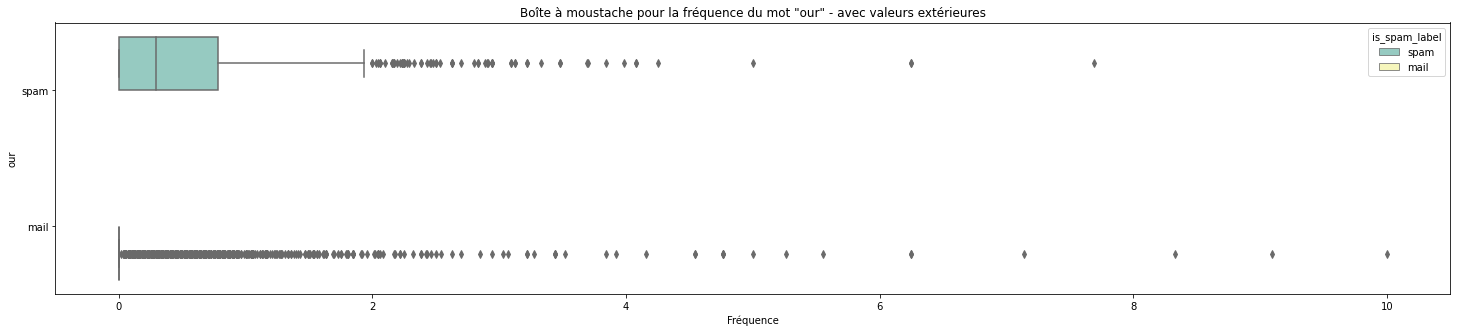

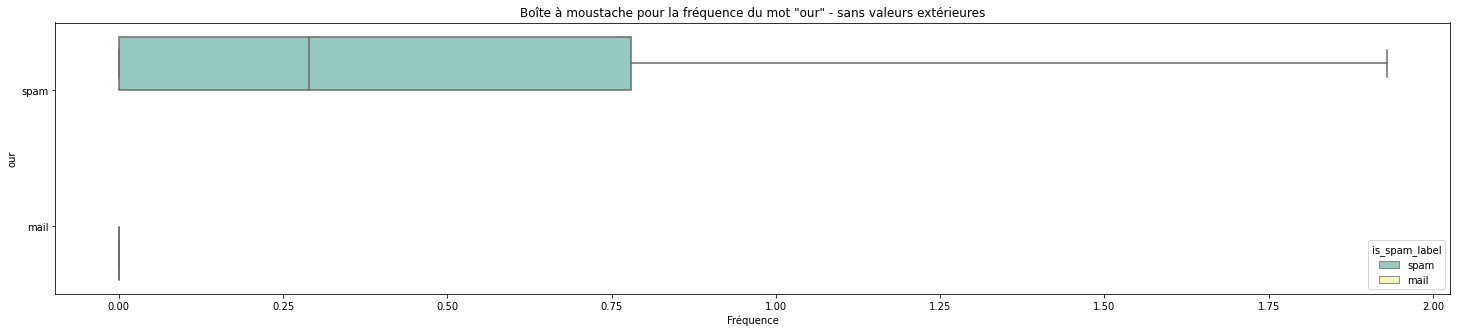

In [33]:
# Affichage avec et sans les valeurs extérieures
plot_box_compare_isspam_vertical('our', dfData, True)
plot_box_compare_isspam_vertical('our', dfData, False)

In [34]:
# Affichage sous forme de tableau
dfData[['wf_our', 'is_spam_label']].groupby('is_spam_label').describe()

wf_our                                                 
                count      mean       std  min  25%   50%   75%    max
is_spam_label                                                         
mail           2788.0  0.181040  0.614521  0.0  0.0  0.00  0.00  10.00
spam           1813.0  0.513955  0.707195  0.0  0.0  0.29  0.78   7.69

L'étude du mot "our" se révèle très intéressant. Tandis qu'on aurait pu croire avec le graphique des moyennes des fréquences que le mot "our" était quand même assez présent dans les mails, on voit ici que plus de 75% des valeurs ont une fréquence égale à 0 pour les mails.

Tandis que pour les spams, plus de la moitié des valeurs sont supérieures à 0.29 et un tiers des valeurs supérieures à 0.78. 

Avec le mot "your", "our" est définitivement intéressant.

### Etude du mot "all"

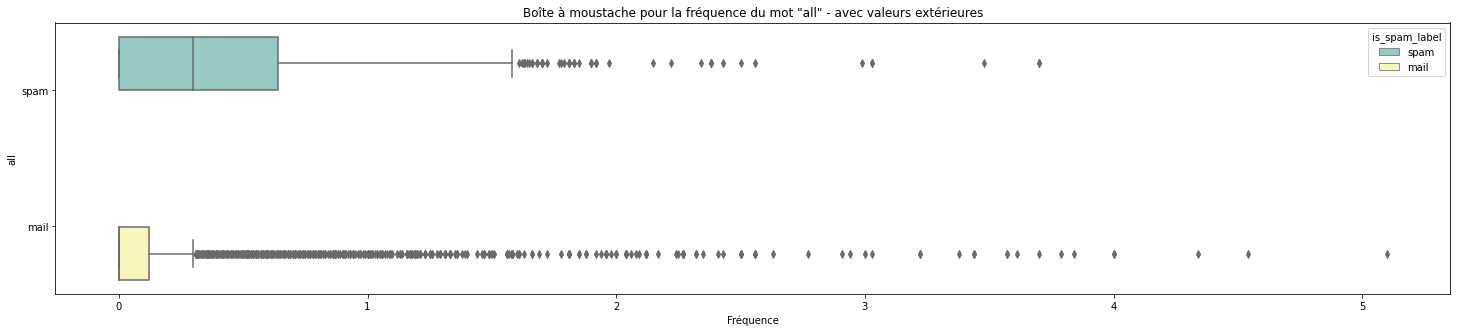

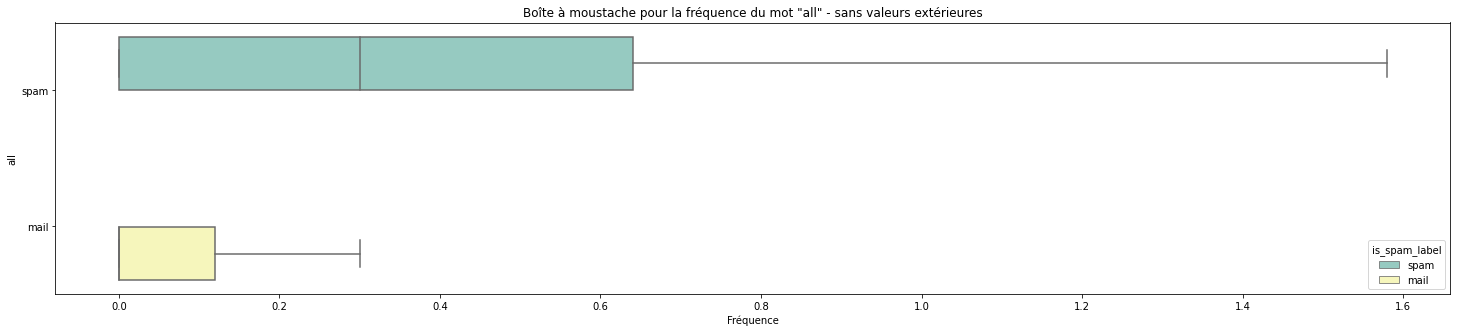

In [35]:
# Affichage avec et sans les valeurs extérieures
plot_box_compare_isspam_vertical('all', dfData, True)
plot_box_compare_isspam_vertical('all', dfData, False)

In [36]:
# Affichage sous forme de tableau
dfData[['wf_all', 'is_spam_label']].groupby('is_spam_label').describe()

wf_all                                              
                count      mean       std  min  25%  50%   75%  max
is_spam_label                                                      
mail           2788.0  0.200581  0.502959  0.0  0.0  0.0  0.12  5.1
spam           1813.0  0.403795  0.480725  0.0  0.0  0.3  0.64  3.7

Encore une fois, la moyenne se révèle dangereuse pour la classe mail. Pour une moyenne de 0.2, seulement 75% des valeurs sont supérieures à 0.12. 

La moyenne des spams est beaucoup plus proche de sa médiane, respectivement 0.4 et 0.3. On peut donc en conclure que si la fréquence est supérieure à 0.64, il y a de fortes chances qu'on ait affaire à un spam. 


### Conclusion

Les deux mots que nous allons retenir sont "your" et "our". 

## Sélection finale des attributs significatifs

Pour résumer, les mots semblant avoir le plus d'impact sont, pour chaque catégorie:

**Pour les mails:**
- george
- hp
- hpl
- edu
- meeting

**Pour les spams:**
- free
- your
- our

Nous allons maintenant regarder dans une matrice de corrélation si ces mots semblent être de bons indicateurs.

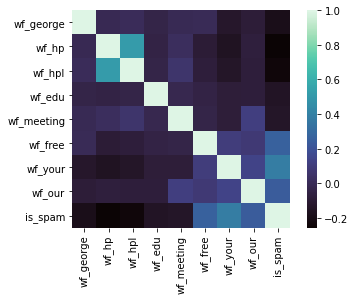

In [37]:
# Création de la matrice de corrélation
correlation_matrix = dfData[['wf_george', 'wf_hp', 'wf_hpl', 'wf_edu', 'wf_meeting', 'wf_free', 'wf_your', 'wf_our', 'is_spam']].corr()
sns.heatmap(correlation_matrix, cmap ="mako", square=True)

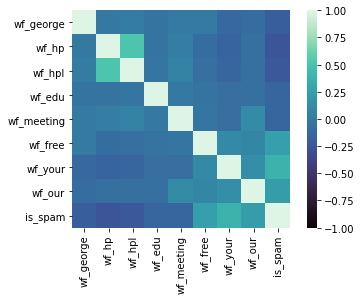

In [38]:
# On va fixer un minimum, pour pouvoir mieux voir les valeurs négatives
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap ="mako", square=True)

Nous avons donc déjà identifié de bons attributs, les plus efficaces semblant être le couple hp / hpl, et le mot you.

# Etudes de la fréquence des caractères

Vu que nous n'avons que cinq colonnes touchant aux caractères, nous allons pouvoir tous les regarder en même temps. 

Comme pour les mots, on va commencer par l'étude de leurs moyennes.

<Figure size 1080x1440 with 0 Axes>

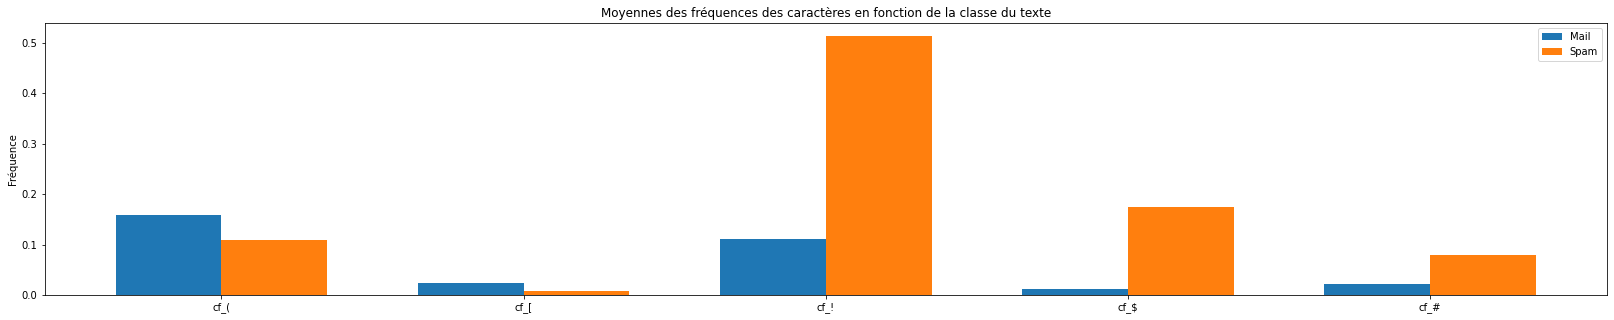

In [39]:
plot_bar_compare_isspam('Moyennes des fréquences des caractères en fonction de la classe du texte', df_means, char_frequency_columns)

On peut déjà observer que l'utilisation de point d'exclamation "!" semble être très utile pour détecter un spam, ainsi que l'utilisation du signe dollar "$". 

Regardons la matrice de corrélation:

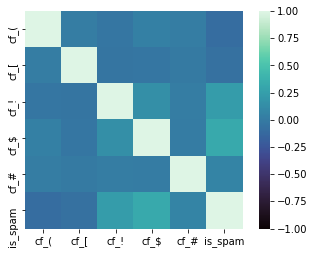

In [40]:
# Création de la matrice de corrélation
correlation_matrix = dfData[['cf_(', 'cf_[', 'cf_!', 'cf_$', 'cf_#', 'is_spam']].corr()
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap ="mako", square=True)

Le signe du dollar semble être légèrement plus utile pour détecter un spam que le point d'exclamation, mais ils restent proches. 

Pour détecter un mail, on peut voir que la parenthèse peut être utile, suivi par le crochet "[". 

Le signe dièse quand à lui semble avoisiner autour des 0, nous le mettrons donc potentiellement de côté lors du modèle d'IA.

Regardons de plus près les statistiques du signe parenthèse car avec sa moyenne, il ne semblait pas à première vue être un bon indicateur :

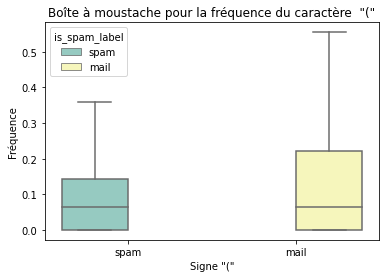

In [41]:
# Affichage de la boîte à moustache de la fréquence du caractère "(" sans les valeurs extérieures
sns.boxplot(x='is_spam_label', y='cf_(', hue='is_spam_label',
              data=dfData, palette="Set3", showfliers = False)
plt.ylabel('Fréquence')
plt.xlabel('Signe "("')
plt.title('Boîte à moustache pour la fréquence du caractère  "("')

plt.show()

In [42]:
# Affichage sous forme de tableau
dfData[['cf_(', 'is_spam_label']].groupby('is_spam_label').describe()

cf_(                                                    
                count      mean       std  min  25%     50%    75%    max
is_spam_label                                                            
mail           2788.0  0.158578  0.260604  0.0  0.0  0.0645  0.222  5.277
spam           1813.0  0.108970  0.282141  0.0  0.0  0.0650  0.144  9.752

On peut voir que la médiane est sensiblement la même entre les deux classes. Cependant, une valeur supérieure à 0.222 a un peu plus de chance de provenir d'un mail que d'un spam. 

# Etudes des statistiques sur les capitales

Pour les capitales, nous avons trois attributs à étudier:

- cap_rl_average: longueur moyenne des séquences ininterrompues de majuscules
- cap_rl_longest: longueur de la plus longue séquence ininterrompue de lettres majuscules

- cap_rl_total: nombre total de majuscules 

On va commencer par modifier notre précédente fonction permettant d'afficher des boîtes à moustache.

In [47]:
# Fonction d'affichage d'une boîte à moustache pour un mot donné du dataset
def plot_box_compare_isspam_vertical(name, xlabel, df, showfliers):
    plt.figure(figsize=(25,5))
    sns.boxplot(x=name, y='is_spam_label', hue='is_spam_label',
                 data=df, palette="Set3", showfliers = showfliers)
    plt.ylabel(name)
    plt.xlabel(xlabel)
    # Définition du titre
    title = 'Boîte à moustache pour l\'attribut "' + name + '"'
    if (showfliers):
      title += ' - avec valeurs extérieures'
    else:
      title += ' - sans valeurs extérieures'
      
    plt.title(title)


## Etude de l'attribut cap_rl_average

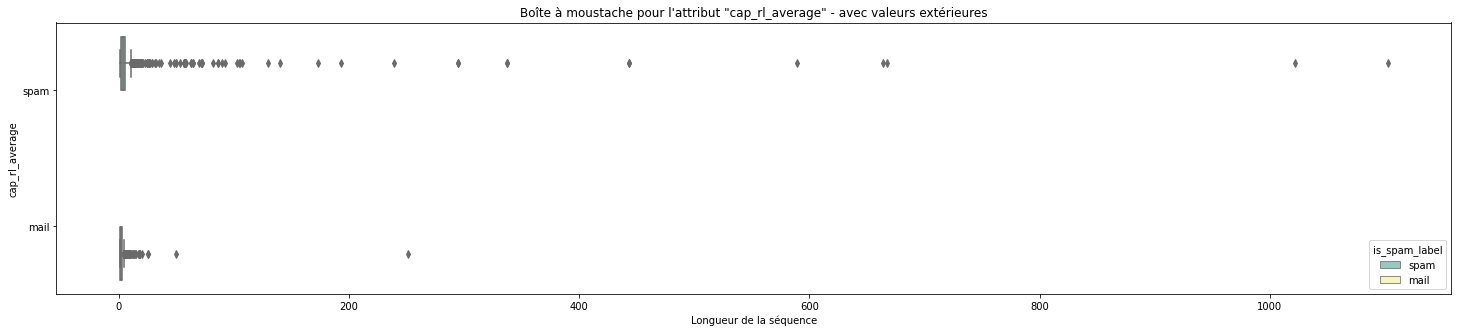

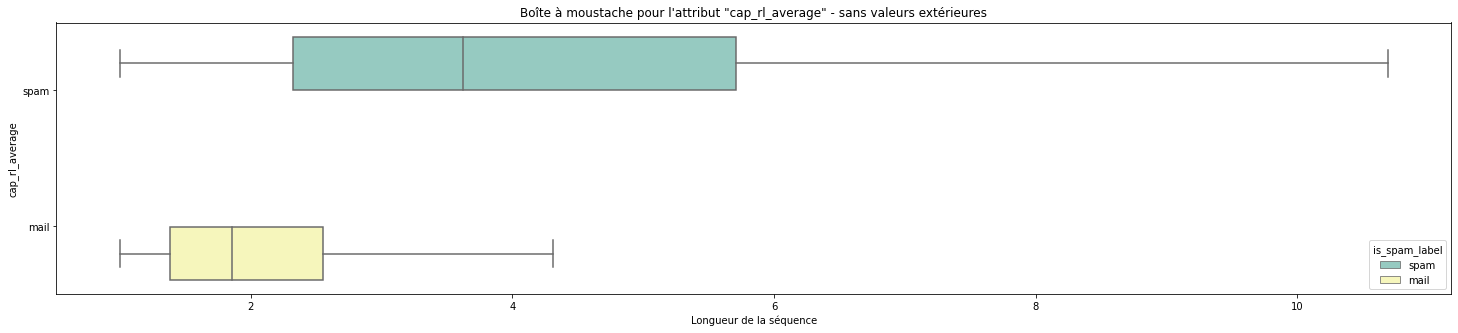

In [49]:
# Affichage des boîtes à moustache
plot_box_compare_isspam_vertical('cap_rl_average', 'Longueur de la séquence', dfData, True)
plot_box_compare_isspam_vertical('cap_rl_average', 'Longueur de la séquence', dfData, False)

In [50]:
# Affichage sous forme de tableau
dfData[['cap_rl_average', 'is_spam_label']].groupby('is_spam_label').describe()

cap_rl_average                       ...                      
                       count      mean        std  ...    50%    75%     max
is_spam_label                                      ...                      
mail                  2788.0  2.377301   5.113685  ...  1.857  2.555   251.0
spam                  1813.0  9.519165  49.846186  ...  3.621  5.708  1102.5

[2 rows x 8 columns]

Attribut très intéréssant, on peut en conclure qu'on a beaucoup plus de chance de faire affaire à un spam lorsque la longueur moyenne est supérieure à 2.5.

Cela n'est pas étonnant, dans le sens où l'emploi des majuscules apportent un effet d'urgence/de danger/d'occasion à ne pas manquer, que les spammeurs aiment employer.

## Etude de l'attribut cap_rl_longest

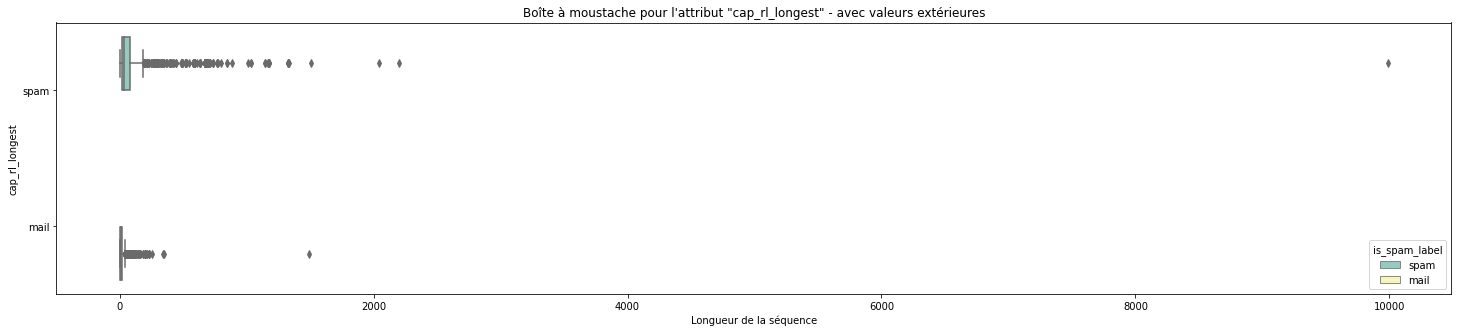

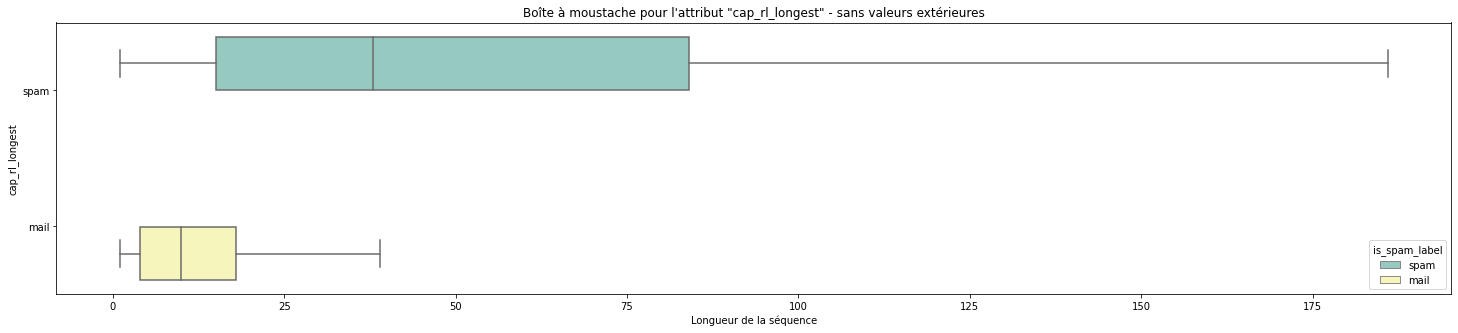

In [51]:
# Affichage des boîtes à moustache
plot_box_compare_isspam_vertical('cap_rl_longest', 'Longueur de la séquence', dfData, True)
plot_box_compare_isspam_vertical('cap_rl_longest', 'Longueur de la séquence', dfData, False)

In [52]:
# Affichage sous forme de tableau
dfData[['cap_rl_longest', 'is_spam_label']].groupby('is_spam_label').describe()

cap_rl_longest                          ...                    
                       count        mean         std  ...   50%   75%     max
is_spam_label                                         ...                    
mail                  2788.0   18.214491   39.084792  ...  10.0  18.0  1488.0
spam                  1813.0  104.393271  299.284969  ...  38.0  84.0  9989.0

[2 rows x 8 columns]

Rien de surprenant par rapport à ce que l'on a appris avec l'étude de l'attribut précédent "cap_rl_average". 

Cependant, je ne m'attendais pas au 3éme quartile de la classe mail d'être aussi haut que 18. De ce que j'ai pu trouver sur internet, la taille moyenne d'un mot anglais tourne aux alentours de 4.7 à 5 caractères. Donc on aurait plus de 15% des mails qui emploieraient en moyenne 3 à 4 mots en majuscules d'affilée. 

Cela n'est tout de même pas grand chose par rapport à la classe spam, qui a plus de 50% de ses textes contenant une séquence de majuscule ininterrompue de 38 caractères, soit environ 7.6 mots d'affilée (38/5).

## Etude de l'attribut cap_rl_total

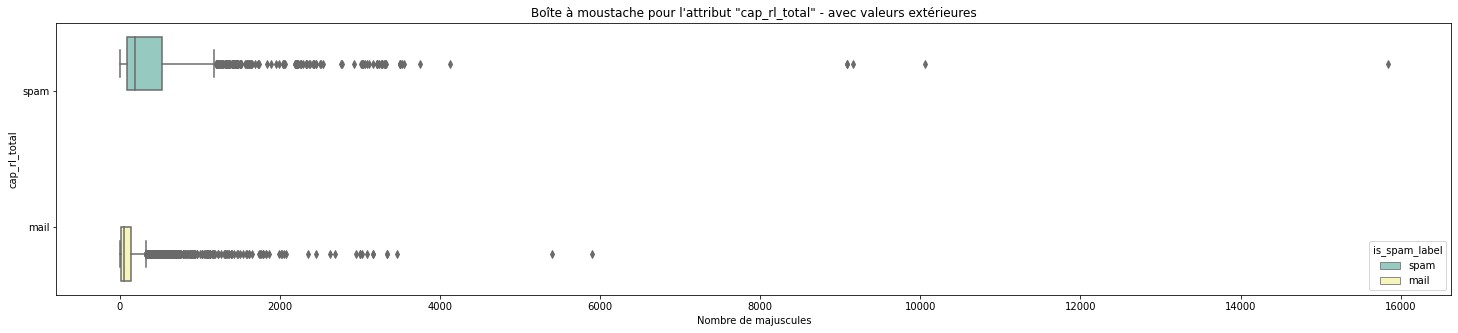

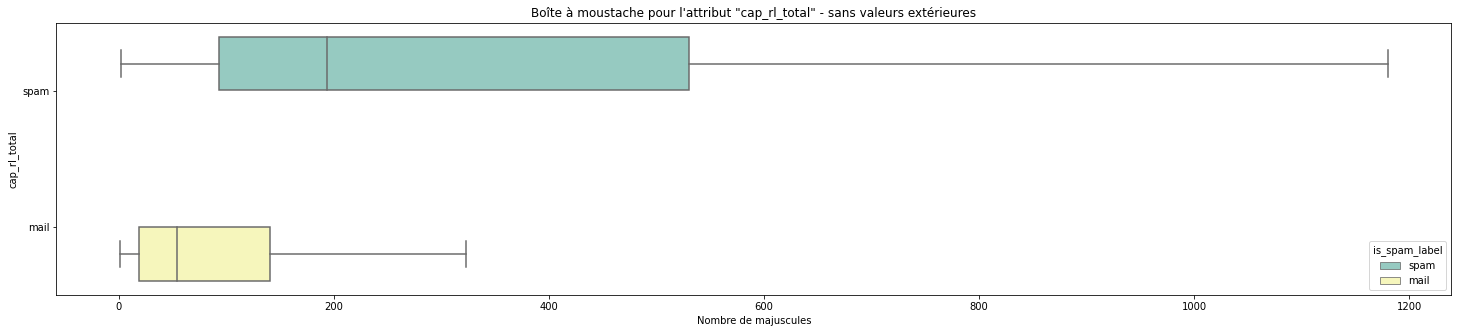

In [55]:
# Affichage des boîtes à moustache
plot_box_compare_isspam_vertical('cap_rl_total', 'Nombre de majuscules', dfData, True)
plot_box_compare_isspam_vertical('cap_rl_total', 'Nombre de majuscules', dfData, False)

In [54]:
# Affichage sous forme de tableau
dfData[['cap_rl_total', 'is_spam_label']].groupby('is_spam_label').describe()

cap_rl_total                          ...                       
                     count        mean         std  ...    50%    75%      max
is_spam_label                                       ...                       
mail                2788.0  161.470947  355.738403  ...   54.0  141.0   5902.0
spam                1813.0  470.619415  825.081179  ...  194.0  530.0  15841.0

[2 rows x 8 columns]

Il est vraiment dommage de ne pas avoir de moyen d'accèder à la taille totale des textes ici, et pourquoi pas le nombre de phrase au total dans le texte.

En effet, on peut voir que dans plus de 50% des cas pour les mails, on se retrouverait avec 54 majuscules au total. Il ne faut pas oublier que dans un mail normal, les phrases commencent par une majuscule, ainsi que les noms propres et certaines abréviations (comme ASAP par exemple). Mais 54 majuscules me semble tout de même être un chiffre élevé. Et c'est encore plus impressionnant de se dire que 15% de ces mails ont plus de 141 majuscules. 

Mis à part cela, comme les deux précédents attributs, on voit bien que la classe spam se démarque de la classe mail par son grand nombre.



# Etude ML


Après recherche, les meilleurs modèles utilisés pour les filtres anti-spam s'avèrent être de la famille de la classification naïve bayésienne (NB).
Ainsi, nous nous contenterons de tester trois types de modèle NB:
- BernouilliNB
- GaussianNB
- MultinomialNB



In [132]:
import sklearn
# FONCTIONS
from sklearn.model_selection import train_test_split
# MODELES
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
# METRIQUES
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Préparation des données

In [68]:
# Organisation des données
label_names = ['mail', 'spam']
labels = dfData['is_spam']
feature_names = columnsName
# On ne prend pas la dernière colonne de label
features = np.asarray(dfData[feature_names].values)

In [131]:
# Partage des données entre le dataset de train et de test
train, test, train_labels, test_labels = train_test_split(features,
                                                         labels,
                                                         test_size=0.4,
                                                         random_state=0)

Afin de comparer nos modèles, nous allons créer une fonction permettant de les entraîner et d'afficher les résultats.

In [107]:
# Permet de sélectionner un modèle de NB, l'entraîner et afficher ses résultats
# Renvoie la précision et le nombre de valeurs non identifiées correctement
def create_and_evaluate_model(name, train, train_labels, test, test_labels, label_names):
  # Selection du modèle
  classifier = GaussianNB()
  if (name == 'bnb'):
    classifier = BernoulliNB()
  if (name == 'mnb'):
    classifier = MultinomialNB()

  # Entraînement
  model = classifier.fit(train, train_labels)

  # Prédictions
  preds = classifier.predict(test)
  
  # Affichage des résultats
  print("Précision du modèle: " + str(accuracy_score(test_labels, preds)))

  print("Nombre de mails non identifiés correctement sur un total de %d mails : %d" % (test.shape[0], (test_labels != preds).sum()))

  print(classification_report(test_labels, preds, target_names=label_names))

  # Matrice de confusion
  cm = confusion_matrix(test_labels, preds)
  ConfusionMatrixDisplay(cm).plot(cmap="mako")

  return [accuracy_score(test_labels, preds), (test_labels != preds).sum()]


## Modèle GaussianNB

Précision du modèle: 0.9989136338946225
Nombre de mails non identifiés correctement sur un total de 1841 mails : 2
              precision    recall  f1-score   support

        mail       1.00      1.00      1.00      1097
        spam       1.00      1.00      1.00       744

    accuracy                           1.00      1841
   macro avg       1.00      1.00      1.00      1841
weighted avg       1.00      1.00      1.00      1841



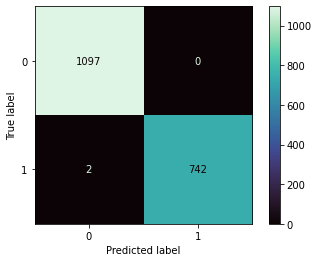

In [110]:
gnb_accuracy, gnb_wrong_labeled = create_and_evaluate_model('gnb', train, train_labels, test, test_labels, label_names)

Le résultat est excellent: 99,89% de précision ! De plus, il est préférable pour notre filtre d'avoir des faux positifs que l'inverse. En effet, si un spam ou deux sont identifiés comme mails, c'est désagréable pour l'utilisateur, mais cela s'arrête là. 

Tandis que si l'on classe un mail en tant que spam, c'est beaucoup plus problématique pour l'utilisateur, vu que ce mail sera directement placé dans la corbeille, sans notifier l'utilisateur.

Pour l'instant, ce modèle est en top position !

## Modèle BernouilliNB

Précision du modèle: 0.9755567626290059
Nombre de mails non identifiés correctement sur un total de 1841 mails : 45
              precision    recall  f1-score   support

        mail       0.97      0.99      0.98      1097
        spam       0.99      0.95      0.97       744

    accuracy                           0.98      1841
   macro avg       0.98      0.97      0.97      1841
weighted avg       0.98      0.98      0.98      1841



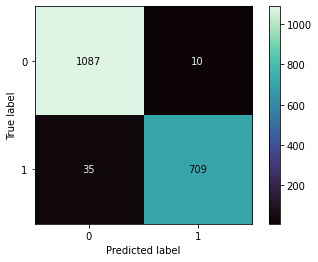

In [111]:
bnb_accuracy, bnb_wrong_labeled = create_and_evaluate_model('bnb', train, train_labels, test, test_labels, label_names)

La précision est déjà moins bonne que pour le modèle Gaussien. De plus, en plus d'avoir 35 spams identifiés comme mails, on a surtout 10 mails identifiés comme spams !

Le modèle Gaussien reste en tête.

## Modèle MultinomialNB

Précision du modèle: 0.872895165670831
Nombre de mails non identifiés correctement sur un total de 1841 mails : 234
              precision    recall  f1-score   support

        mail       0.91      0.87      0.89      1097
        spam       0.82      0.88      0.85       744

    accuracy                           0.87      1841
   macro avg       0.87      0.87      0.87      1841
weighted avg       0.88      0.87      0.87      1841



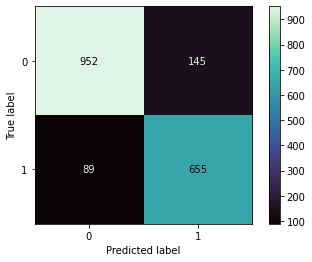

In [112]:
mnb_accuracy, mnb_wrong_labeled = create_and_evaluate_model('mnb', train, train_labels, test, test_labels, label_names)

Par rapport aux deux modèles précédents, la précision chute de 10%. 

Et pour finir, on a beaucoup plus de mails identifiés comme spams que l'inverse. Ce modèle est à proscrire.

## Comparaison des modèles

Après les avoir regardé individuellement, on va comparer les performances entre eux.

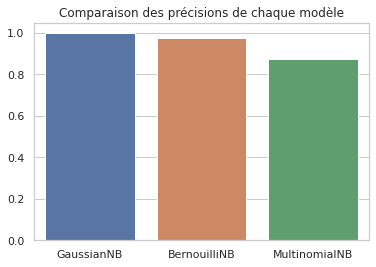

In [126]:
sns.set_theme(style="whitegrid")
# Affichage de la précision de chaque modèle
ax = sns.barplot(y=[gnb_accuracy, bnb_accuracy, mnb_accuracy], x=['GaussianNB', 'BernouilliNB', 'MultinomialNB']).set_title('Comparaison des précisions de chaque modèle')

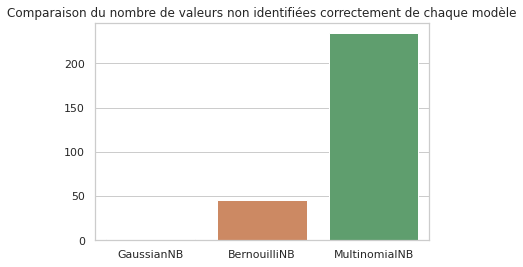

In [128]:
# Affichage du nombre de valeurs incorrectement identifiées
ax = sns.barplot(y=[gnb_wrong_labeled, bnb_wrong_labeled, mnb_wrong_labeled], x=['GaussianNB', 'BernouilliNB', 'MultinomialNB']).set_title('Comparaison du nombre de valeurs non identifiées correctement de chaque modèle')


Il n'y a pas photo: le modèle Gaussien remporte haut la main la manche.

# Exportation du modèle

In [64]:
from joblib import dump, load

model = gnb.fit(train, train_labels)

dump(model, 'model_saved.joblib')

['model_saved.joblib']